<a href="https://colab.research.google.com/github/CristinaMarsh/Data/blob/main/Dataset/2023_7_23_ecmwf%E4%B8%8B%E8%BD%BD%EF%BC%9B_proplot_%E5%AE%89%E8%A3%85%EF%BC%9BERA_analysis%3B_AW3_ERA5%EF%BC%9B%E5%BA%A6%E5%88%86%E7%A7%92%E8%BD%AC%E6%8D%A2%EF%BC%9B_PDF%E8%AF%BB%E5%8F%96%E8%A1%A8%E6%A0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECMWF下载

https://www.heywhale.com/mw/project/63abb648cc0e15440fd86995

In [1]:
! pip install ecmwf-api-client

  Preparing metadata (setup.py) ... done
  Created wheel for ecmwf-api-client: filename=ecmwf_api_client-1.6.3-py3-none-any.whl size=13514 sha256=07e61bedbc6a3d7873dbc0ece8f9deb35ea0d8209b2de9fd7c0406c84cec3784
  Stored in directory: /root/.cache/pip/wheels/16/64/8f/f0038cd123b884423739feea02cd13466b01ec8b08e5d1de93
Successfully built ecmwf-api-client


In [3]:
from ecmwfapi import ECMWFDataServer

In [4]:
server = ECMWFDataServer(url="https://api.ecmwf.int/v1",
                         key="b9ae3607acade652ff8458ed22612ca1",
                         email="zhengjingmachristina@gmail.com")

In [6]:
#下载TIGGE数据
#示例：https://confluence.ecmwf.int/display/WEBAPI/Python+TIGGE+examples

server.retrieve({'origin'    : "ecmf",
                 'levtype'   : "sfc",
                 'number'    : "1/2/3/4/5/6/7/8/9/10/11/12/13/14/15/16/17/18/19/20/21/22/23/24/25/26/27/28/29/30/31/32/33/34/35/36/37/38/39/40/41/42/43/44/45/46/47/48/49/50",
                 'expver'    : "prod",
                 'dataset'   : "tigge",
                 'step'      : "0/6/12/18",
                 'grid'      : "0.5/0.5",
                 'param'     : "167",
                 'time'      : "00/12",
                 'date'      : "2014-11-01",
                 'type'      : "pf",
                 'class'     : "ti",
                 'target'    : "tigge_ecmf_2014-11-01_0012.grib"
                 })


2023-07-23 01:25:13 ECMWF API python library 1.6.3
2023-07-23 01:25:13 ECMWF API at https://api.ecmwf.int/v1
2023-07-23 01:25:13 Welcome zhengjing ma
2023-07-23 01:25:13 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2023-07-23 01:25:13 Request submitted
2023-07-23 01:25:13 Request id: 64bc817987bd1922cf784de5
2023-07-23 01:25:13 Request is submitted
2023-07-23 01:25:15 Calling 'nice mars /tmp/20230723-0120/d2/tmp-_mars-7Ptjm5.req'
2023-07-23 01:25:15 mars - WARN -
2023-07-23 01:25:15 mars - WARN -
2023-07-23 01:25:15 MIR environment variables:
2023-07-23 01:25:15 MIR_CACHE_PATH=/data/ec_coeff
2023-07-23 01:25:15 Using MARS binary: /usr/local/apps/mars/versions/6.33.15.2/bin/mars.bin
2023-07-23 01:25:15 mars - INFO   - 20230723.012514 - Welcome to MARS
2023-07-23 01:25:15 mars - INFO   - 20230723.012514 - MARS Client build stamp: 20230328082615
2023-07-23 01:25:15 mars - INFO   - 20230723.012514 - MARS Client b

In [7]:
!pip install pygrib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 9.5 MB/s eta 0:00:00


In [8]:
import pygrib

In [9]:
grbs = pygrib.open('/content/tigge_ecmf_2014-11-01_0012.grib')
grbs.seek(0)
for grb in grbs:
    print(grb)

1:2 metre temperature:K (instant):regular_ll:heightAboveGround:level 2 m:fcst time 0 hrs:from 201411010000:pos ens pert 1
2:2 metre temperature:K (instant):regular_ll:heightAboveGround:level 2 m:fcst time 0 hrs:from 201411010000:pos ens pert 2
3:2 metre temperature:K (instant):regular_ll:heightAboveGround:level 2 m:fcst time 0 hrs:from 201411010000:pos ens pert 3
4:2 metre temperature:K (instant):regular_ll:heightAboveGround:level 2 m:fcst time 0 hrs:from 201411010000:pos ens pert 4
5:2 metre temperature:K (instant):regular_ll:heightAboveGround:level 2 m:fcst time 0 hrs:from 201411010000:pos ens pert 5
6:2 metre temperature:K (instant):regular_ll:heightAboveGround:level 2 m:fcst time 0 hrs:from 201411010000:pos ens pert 6
7:2 metre temperature:K (instant):regular_ll:heightAboveGround:level 2 m:fcst time 0 hrs:from 201411010000:pos ens pert 7
8:2 metre temperature:K (instant):regular_ll:heightAboveGround:level 2 m:fcst time 0 hrs:from 201411010000:pos ens pert 8
9:2 metre temperature:K 

# ERA Interim气象再分析数据下载


https://www.heywhale.com/mw/project/63abaee077ff71c3194fde1e

## 下载ERA Interim再分析（netcdf格式）

In [11]:
# 单日下载
server.retrieve({
    # Specify the ERA-Interim data archive. Don't change.
    "class": "ei",        #e4
    "dataset": "interim", #era40
    "expver": "1",
    "stream": "oper",
    # pressure levels (levtype:pl), all available levels (levelist)
    "levtype": "pl",   #"sfc"
    #"levelist": "1/2/3/5/7/10/20/30/50/70/100/125/150/175/200/225/250/300/350/400/450/500/550/600/650/700/750/775/800/825/850/875/900/925/950/975/1000",
    "levelist":"200/225/250/300/350/400/450/500/550/600/650/700/750/775/800/825/850/875/900/925/950/975/1000",
    # forecast (type:fc), from both daily forecast runs (time) with all available forecast steps (step, in hours)
    # analysis (type:an)
    "type": "an",
    "time": "00:00:00/06:00:00/12:00:00/18:00:00",
    "step":"0",
    # all available parameters, for codes see http://apps.ecmwf.int/codes/grib/param-db
    # "param": "60.128/129.128/130.128/131.128/132.128/133.128/135.128/138.128/155.128/157.128/203.128/246.128/247.128/248.128",
    "param": "129.128/130.128/131.128/132.128/135.128/133.128",
    # two days worth of data
    # "date": "2015-06-24/to/2015-06-26",
    "date": "2015-06-24",
    # in 0.75 degrees lat/lon
    "grid": "0.75/0.75",
    # optionally restrict area to Europe (in N/W/S/E).
    # "area": "75/-20/10/60",
    # Optionally get output in NetCDF format. However, for NetCDF timestamps (time+step) must not overlap,
    # so use e.g. "time":"00:00:00/12:00:00","step":"12"
    "format" : "netcdf",
    # set an output file name
    "target": "ERI_2015-06-24.nc",
})

2023-07-23 01:54:00 ECMWF API python library 1.6.3
2023-07-23 01:54:00 ECMWF API at https://api.ecmwf.int/v1
2023-07-23 01:54:00 Welcome zhengjing ma
2023-07-23 01:54:01 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2023-07-23 01:54:01 Request submitted
2023-07-23 01:54:01 Request id: 64bc8839bf292797ae6cf022
2023-07-23 01:54:01 Request is submitted


APIException: ignored

In [12]:
# 单日下载
server.retrieve({
    # Specify the ERA-Interim data archive. Don't change.
    "class": "ei",        #e4
    "dataset": "interim", #era40
    "expver": "1",
    "stream": "oper",
    # pressure levels (levtype:pl), all available levels (levelist)
    "levtype": "pl",   #"sfc"
    #"levelist": "1/2/3/5/7/10/20/30/50/70/100/125/150/175/200/225/250/300/350/400/450/500/550/600/650/700/750/775/800/825/850/875/900/925/950/975/1000",
    "levelist":"200/225/250/300/350/400/450/500/550/600/650/700/750/775/800/825/850/875/900/925/950/975/1000",
    # forecast (type:fc), from both daily forecast runs (time) with all available forecast steps (step, in hours)
    # analysis (type:an)
    "type": "an",
    "time": "00:00:00/06:00:00/12:00:00/18:00:00",
    "step":"0",
    # all available parameters, for codes see http://apps.ecmwf.int/codes/grib/param-db
    # "param": "60.128/129.128/130.128/131.128/132.128/133.128/135.128/138.128/155.128/157.128/203.128/246.128/247.128/248.128",
    "param": "129.128/130.128/131.128/132.128/135.128/133.128",
    # two days worth of data
    # "date": "2015-06-24/to/2015-06-26",
    "date": "2015-06-24",
    # in 0.75 degrees lat/lon
    "grid": "0.75/0.75",
    # optionally restrict area to Europe (in N/W/S/E).
    # "area": "75/-20/10/60",
    # Optionally get output in NetCDF format. However, for NetCDF timestamps (time+step) must not overlap,
    # so use e.g. "time":"00:00:00/12:00:00","step":"12"
    # set an output file name
    "target": "ERI_2015-06-24.grib",
})

2023-07-23 01:55:47 ECMWF API python library 1.6.3
2023-07-23 01:55:47 ECMWF API at https://api.ecmwf.int/v1
2023-07-23 01:55:48 Welcome zhengjing ma
2023-07-23 01:55:52 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2023-07-23 01:55:53 Request submitted
2023-07-23 01:55:53 Request id: 64bc88a987bd1922cf784df8
2023-07-23 01:55:53 Request is submitted


APIException: ignored

In [13]:
# 单日下载
server.retrieve({
    # Specify the ERA-Interim data archive. Don't change.
    "class": "ei",        #e4
    "dataset": "interim", #era40
    "expver": "1",
    "stream": "oper",
    # pressure levels (levtype:pl), all available levels (levelist)
    "levtype": "pl",   #"sfc"
    #"levelist": "1/2/3/5/7/10/20/30/50/70/100/125/150/175/200/225/250/300/350/400/450/500/550/600/650/700/750/775/800/825/850/875/900/925/950/975/1000",
    "levelist":"200/225/250/300/350/400/450/500/550/600/650/700/750/775/800/825/850/875/900/925/950/975/1000",
    # forecast (type:fc), from both daily forecast runs (time) with all available forecast steps (step, in hours)
    # analysis (type:an)
    "type": "fc",
    "time": "00:00:00/06:00:00/12:00:00/18:00:00",
    "step":"0",
    # all available parameters, for codes see http://apps.ecmwf.int/codes/grib/param-db
    # "param": "60.128/129.128/130.128/131.128/132.128/133.128/135.128/138.128/155.128/157.128/203.128/246.128/247.128/248.128",
    "param": "129.128/130.128/131.128/132.128/135.128/133.128",
    # two days worth of data
    # "date": "2015-06-24/to/2015-06-26",
    "date": "2015-06-24",
    # in 0.75 degrees lat/lon
    "grid": "0.75/0.75",
    # optionally restrict area to Europe (in N/W/S/E).
    # "area": "75/-20/10/60",
    # Optionally get output in NetCDF format. However, for NetCDF timestamps (time+step) must not overlap,
    # so use e.g. "time":"00:00:00/12:00:00","step":"12"
    "format" : "netcdf",
    # set an output file name
    "target": "ERI_2015-06-24.nc",
})

2023-07-23 01:58:48 ECMWF API python library 1.6.3
2023-07-23 01:58:48 ECMWF API at https://api.ecmwf.int/v1
2023-07-23 01:58:48 Welcome zhengjing ma
2023-07-23 01:58:49 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2023-07-23 01:58:49 Request submitted
2023-07-23 01:58:49 Request id: 64bc895937d9b3454f6cd732
2023-07-23 01:58:49 Request is submitted


APIException: ignored

In [14]:
! pip install cdsapi

  Preparing metadata (setup.py) ... done
  Created wheel for cdsapi: filename=cdsapi-0.6.1-py2.py3-none-any.whl size=12009 sha256=8a658c1c472bcdd39e26feb0a3698fd470ddc12716958756a35b5ba09301235b
  Stored in directory: /root/.cache/pip/wheels/7c/63/08/45461d6f6636c1aba7846828d8c787a064073945048f76d44a
Successfully built cdsapi


In [16]:
url = 'url: https://cds.climate.copernicus.eu/api/v2'
key = 'key: 117001:448bd51e-d40e-4385-b677-f0c758c3ed76'

with open('/root/.cdsapirc', 'w') as f:
    f.write('\n'.join([url, key]))

with open('/root/.cdsapirc') as f:
    print(f.read())

url: https://cds.climate.copernicus.eu/api/v2
key: 117001:448bd51e-d40e-4385-b677-f0c758c3ed76


In [17]:
import cdsapi
cdsapi.Client()

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import cdsapi
import xarray as xr
from urllib.request import urlopen
# start the client
cds = cdsapi.Client()
# dataset you want to read
dataset = "reanalysis-era5-pressure-levels-monthly-means"
# flag to download data
download_flag = False
# api parameters
params = {
    "format": "netcdf",
    "product_type": "monthly_averaged_reanalysis",
    "variable": "temperature",
    "pressure_level": '1000',
    'year':['2019','2020'],
    'month':['01','02','03'],
    "time": "00:00",
    "grid": [1.0, 1.0],
    "area": [90, -180, -90, 180],
    }
# retrieves the path to the file
fl = cds.retrieve(dataset, params)
# download the file
if download_flag:
    fl.download("./output.nc")
# load into memory
with urlopen(fl.location) as f:
    ds = xr.open_dataset(f.read())

2023-07-23 02:04:51,792 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-07-23 02:04:51,798 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels-monthly-means
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels-monthly-means
2023-07-23 02:04:52,085 INFO Request is queued
INFO:cdsapi:Request is queued
2023-07-23 02:04:53,119 INFO Request is running
INFO:cdsapi:Request is running
2023-07-23 02:04:56,934 INFO Request is completed
INFO:cdsapi:Request is completed


In [ ]:
# https://confluence.ecmwf.int/display/CKB/Climate+Data+Store+%28CDS%29+API+Keywords 数据清单

In [ ]:
import cdsapi
import xarray as xr
from urllib.request import urlopen
c = cdsapi.Client()
# dataset to read
dataset = 'reanalysis-era5-pressure-levels'
# flag to download data
download_flag = False
# api parameters
params = {
    'format': 'netcdf',
    'product_type': 'reanalysis',
    'variable': 'temperature',
    'pressure_level':'1000',
    'year':['2020'],
    'month':['01','02','03'],
    'day': ['01'],
    'time': ['12:00'],
    'grid': [0.25, 0.25],
    'area': [49.38, -124.67, 25.84, -66.95],
    }
# retrieves the path to the file
fl = c.retrieve(dataset, params)
# download the file
if download_flag:
    fl.download("./output.nc")
# load into memory
with urlopen(fl.location) as f:
    ds = xr.open_dataset(f.read())

In [4]:
def get_era5(dataset_name='reanalysis-era5-single-levels',
             var=None,
             dates=None,
             pressure_level=None,
             grid=[1.0, 1,0],
             area=[90, -180, -90, 180],
             download_flag = False,
             download_file='./output.nc'
            ):
    ''' Get ERA5 reanalysis output from the web
    this script grabs ERA5 variables from the web and stores them
    in an xarray dataset.

    the ERA5 CDS API must be installed on the local machine.
    See section 4 here: https://cds.climate.copernicus.eu/api-how-to

    Parameters
    ----------
    dataset_name: str, default 'reanalysis-era5-single-levels'
        name of dataset to use. Options include:
        * 'reanalysis-era5-single-levels'
        * 'reanalysis-era5-single-levels-monthly-means'
        * 'reanalysis-era5-pressure-levels'
        * 'reanalysis-era5-pressure-levels-monthly-means'
        * 'reanalysis-era5-land'
        * 'reanalysis-era5-land-monthly-means'

    dates: list of strings or datetime64, default None
        example ['1980-01-01', '2020-12-31']
    var: str, default None
        name of variable to download
        example '2m_temperature'
    pressure_level: str, default None
        pressure level to grab data on
    grid: list, deafult [1.0, 1.0]
        spatial lat, lon grid resolution in deg
    area: list, default [90,-180,-90, 180]
        area extent download [N, W, S, E]
    download_flag = True or False, default False
        flag to download data or not
    download_file= str, default './output.nc'
        path to where data should be downloaed to.
        data only downloaded if download_flag is True
    Returns
    -------
    ds: xarrayDataSet
        all the data will be in an xarray dataset

    Example
    -------
    ds = get_era5(dataset_name='reanalysis-era5-single-levels-monthly-means',
                 var='2m_temperature',
                 dates=['2021-02-01'],
                 grid=[0.25, 0.25])

    Notes
    -------
    # cdsapi code is here
    https://github.com/ecmwf/cdsapi/tree/master/cdsapi
    # information on api is here
    https://confluence.ecmwf.int/display/CKB/Climate+Data+Store+%28CDS%29+API+Keywords
    # era5 dataset information is here
    https://confluence.ecmwf.int/display/CKB/The+family+of+ERA5+datasets
    '''
    import cdsapi
    import xarray as xr
    import pandas as pd
    from urllib.request import urlopen

    # test if acceptable pressure level
    acceptable_pressures = [1, 2, 3, 5, 7, 10, 20, 30, 50, 70, range(100, 1000, 25)]
    if pressure_level not in [str(lev) for lev in acceptable_pressures]:
        print(f"!! Pressure level must be in this list: {acceptable_pressures}")

    # start the cdsapi client
    c = cdsapi.Client()

    # parameters
    params = dict(
        format = "netcdf",
        product_type = "reanalysis",
        variable = var,
        grid = grid,
        area = area,
        date = list(dates.strftime('%Y-%m-%d %H:%M')) \
               if isinstance(dates, pd.core.indexes.datetimes.DatetimeIndex)\
               else dates,
        )

    # what to do if asking for monthly means
    if dataset_name in ["reanalysis-era5-single-levels-monthly-means",
                        "reanalysis-era5-pressure-levels-monthly-means",
                        "reanalysis-era5-land-monthly-means"]:
        params["product_type"] = "monthly_averaged_reanalysis"
        _ = params.pop("date")
        params["time"] = "00:00"

        # if time is in list of pandas format
        if isinstance(dates, list):
            dates_pd = pd.to_datetime(dates)
            params["year"] = sorted(list(set(dates_pd.strftime("%Y"))))
            params["month"] = sorted(list(set(dates_pd.strftime("%m"))))
        else:
            params["year"] = sorted(list(set(dates.strftime("%Y"))))
            params["month"] = sorted(list(set(dates.strftime("%m"))))


    # if pressure surface
    if dataset_name in ["reanalysis-era5-pressure-levels-monthly-means",
                        "reanalysis-era5-pressure-levels"]:
        params["pressure_level"] = pressure_level

    # product_type not needed for era5_land
    if dataset_name in ["reanalysis-era5-land"]:
        _ = params.pop("product_type")

    # file object
    fl=c.retrieve(dataset_name, params)

    # download the file
    if download_flag:
        fl.download(f"{download_file}")

    # load into memory and return xarray dataset
    with urlopen(fl.location) as f:
        return xr.open_dataset(f.read())

In [23]:
! pip install git+https://github.com/proplot-dev/proplot.git

  Cloning https://github.com/proplot-dev/proplot.git to /tmp/pip-req-build-ml2oypib
  Running command git clone --filter=blob:none --quiet https://github.com/proplot-dev/proplot.git /tmp/pip-req-build-ml2oypib
  Resolved https://github.com/proplot-dev/proplot.git to commit f0396ffe1d13eb8059a07997c070578aef175393
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for proplot: filename=proplot-0.9.5.post360-py3-none-any.whl size=13456840 sha256=ab090870d8dba60d7bb7833e56f72a9f02176008e2a6401017fa5c6105524b14
  Stored in directory: /tmp/pip-ephem-wheel-cache-cm2jm7pl/wheels/b9/f3/16/5af46928f0f5e71fc867f7689c2809fcd02ae3d67355959e57
Successfully built proplot
  Attempting uninstall: proplot
    Found existing installation: proplot 0.9.7
    Uninstalling proplot-0.9.7:
      Successfully uninstalled proplot-0.9.7


In [25]:
!pip install matplotlib==3.5.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 24.9 MB/s eta 0:00:00
  Using cached setuptools_scm-7.1.0-py3-none-any.whl (43 kB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3


In [1]:
import proplot as plot

/usr/local/lib/python3.10/dist-packages/proplot/__init__.py:73: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


In [2]:
url = 'url: https://cds.climate.copernicus.eu/api/v2'
key = 'key: 117001:448bd51e-d40e-4385-b677-f0c758c3ed76'

with open('/root/.cdsapirc', 'w') as f:
    f.write('\n'.join([url, key]))

with open('/root/.cdsapirc') as f:
    print(f.read())

url: https://cds.climate.copernicus.eu/api/v2
key: 117001:448bd51e-d40e-4385-b677-f0c758c3ed76


In [6]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 28.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.1 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11080584 sha256=a83d301eaa1a776e6f7d382e31e260537b8bb47a0591de6692b26dfe69fbd8ce
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


In [8]:
'''
this is an example os how to use the get_era5() function
'''
import cdsapi
import xarray as xr
from urllib.request import urlopen
import urllib3
import proplot as plot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)


# get the data using the get_era5() function
# available here: https://gist.github.com/lgloege/f461f8d192e99fe7c36760a7a856b007
ds_out = get_era5(dataset_name='reanalysis-era5-single-levels-monthly-means',
                 var='2m_temperature',
                 dates=['2021-02-01'],
                 grid=[0.25, 0.25])



2023-07-23 02:18:38,045 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-07-23 02:18:38,050 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2023-07-23 02:18:38,143 INFO Request is completed
INFO:cdsapi:Request is completed


!! Pressure level must be in this list: [1, 2, 3, 5, 7, 10, 20, 30, 50, 70, range(100, 1000, 25)]


In [10]:
# create figure and axes
fig, ax = plot.subplots(axwidth=6, tight=True, proj='basemap', proj_kw={'lon_0': -0},)

# format options
ax.format(land=False,
          coast=True,
          innerborders=True,
          borders=True,
          labels=False,
          latlines=None, lonlines=None)

# plot data
map1 = ax.contourf(ds_out['longitude'], ds_out['latitude'],ds_out['t2m'].squeeze()-273.15,
                   vmin=-30, vmax=30,
                   cmap='IceFire',
                   extend='both',
                   levels=20)

# set the title
ax.set_title('ERA5 monthly mean 2m temperature - February 2021', fontsize=14)

# set the colorbar
col = ax.colorbar(map1, loc='b', shrink=0.5, values=np.arange(-30, 30))
col.set_label('$\circ$C', labelpad=0, size=12)
col.ax.tick_params(labelsize=12)

ModuleNotFoundError: ignored

Figure(nrows=1, ncols=1, refwidth=6.0)

# 常用气象数据下载——ERA5再分析(grib格式)


https://www.heywhale.com/mw/project/60ed75fbbe5f09001762ebcb

In [11]:
!pip install era5cli

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.1 MB/s eta 0:00:00
  Created wheel for cdsapi: filename=cdsapi-0.5.1-py2.py3-none-any.whl size=11685 sha256=378b3e3e4ae2a771323420ef437748a9a684695981776dc4985d1889371a50fe
  Stored in directory: /root/.cache/pip/wheels/b9/8c/0d/f4e23258df62b37c61fd553bb272d996068984c6d321c1e87d
  Created wheel for ptable: filename=PTable-0.9.2-py3-none-any.whl size=22908 sha256=64329efee9d14af7299f1535c3f5d267b0e50490c0eb9efedab25ce82d007c24
  Stored in directory: /roo

In [12]:
!era5cli info 2Dvars

Traceback (most recent call last):
  File "/usr/local/bin/era5cli", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/era5cli/cli.py", line 91, in main
    _execute(args)
  File "/usr/local/lib/python3.10/dist-packages/era5cli/cli.py", line 41, in _execute
    return args.info.run_info(input_args)
  File "/usr/local/lib/python3.10/dist-packages/era5cli/args/info.py", line 56, in run_info
    era5info.list()
  File "/usr/local/lib/python3.10/dist-packages/era5cli/info.py", line 50, in list
    print_multicolumn(self.header, self.infolist)
  File "/usr/local/lib/python3.10/dist-packages/era5cli/utils.py", line 133, in print_multicolumn
    nrows = -((-len(info)) // ncols)
ZeroDivisionError: integer division or modulo by zero


# ERA analysis 1


from https://medium.com/analytics-vidhya/best-free-api-for-weather-records-era5-59c0e204829a

In [14]:
import cdsapi
import netCDF4
from netCDF4 import num2date

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def get_weather_data(year, month, day, area, time,
                     file_location = 'weather_data.nc'
                    ):
    """
    Input:
        year, month, day, area, time, file_location: Strings
    Outputs:
        file_location: A string as in input
    """
    c = cdsapi.Client()
    c.retrieve(
        'reanalysis-era5-single-levels',{
            'product_type':'reanalysis', # This is the dataset produced by the CDS
            'variable':['2m_temperature'],
            'year': year,
            'month': month,
            'day': day,
            'area': area,
            'time': time,
            'format':'netcdf' # The format we choose to use
        },
        file_location)
    return(file_location)

In [16]:
#the position of Cambridge in England:
latitude  = "52.205337"
longitude = "0.121817"

In [17]:
# Let's proceed with the request of the data:
file_location = get_weather_data(
	year  = "2019",

	# NB: Single digits days or months must have 0s in front or that will cause an error
	day   = ['01', '02', '03','04', '05', '06','07'],
	month = "04",

	# The ERA5 accept rectangular shape grid as a searching areas
	# but we can use also input a point with this system:ß
	area  = latitude +'/'+ longitude +'/'+ latitude +'/'+ longitude,

	# We can request all 24 hours of the day. The only accepted format are listed here:
	time  = ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00',
         	'06:00', '07:00', '08:00', '09:00', '10:00', '11:00',
         	'12:00', '13:00', '14:00', '15:00', '16:00', '17:00',
         	'18:00', '19:00', '20:00', '21:00', '22:00', '23:00'],
	file_location = 'first_week_Apr_2019.nc')

2023-07-23 02:24:46,712 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-07-23 02:24:46,715 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-07-23 02:24:46,924 INFO Request is queued
INFO:cdsapi:Request is queued
2023-07-23 02:24:47,962 INFO Request is running
INFO:cdsapi:Request is running
2023-07-23 02:24:55,195 INFO Request is completed
INFO:cdsapi:Request is completed
2023-07-23 02:24:55,199 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data1/adaptor.mars.internal-1690079091.8833714-29619-12-fa810b17-792c-4a92-a38d-07c537897350.nc to first_week_Apr_2019.nc (2K)
INFO:cdsapi:Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data1/adaptor.mars.internal-1690079091.8833714-29619-12-fa810b17-792c-4a92-a38d-07c537897350.nc to 

Now we have fetched the data and downloaded the file ‘first_week_Apr_2019.nc’ .

Wa we need now it’s to load it, with the following:



In [18]:
from datetime import datetime, timedelta
def read_netcdf_file(file_location):
    f = netCDF4.Dataset(file_location) # This the python package I used to open the nc file
    t2m = f.variables['t2m'][:].flatten()
    time = f.variables['time'][:].flatten()
    start_time = datetime.strptime("01/01/1900 00:00", "%d/%m/%Y %H:%M")
    time_points = []
    for x in range(len(time)):
        hours_from_start_time = start_time + timedelta(hours=int(time.data[x]))
        time_points.append(hours_from_start_time)

    values = pd.DataFrame({
        "t2m" : [x-273.15 for x in t2m.data if x!= -32767], # As we said the values are in Kelvin, to convert in Celsius we have to subtract 273.15
        "time" : time_points
        })
    return(values)

The function opens the file in format “.nc” and returns a pandas dataframe with the value of temperature and datapoint.

In [19]:
weather_data = read_netcdf_file('first_week_Apr_2019.nc')
# This is the results:
print(weather_data)

          t2m                time
0    3.098695 2019-04-01 00:00:00
1    2.889338 2019-04-01 01:00:00
2    2.439536 2019-04-01 02:00:00
3    2.258907 2019-04-01 03:00:00
4    1.965138 2019-04-01 04:00:00
..        ...                 ...
163  8.913069 2019-04-07 19:00:00
164  8.548466 2019-04-07 20:00:00
165  7.649648 2019-04-07 21:00:00
166  7.184301 2019-04-07 22:00:00
167  7.305902 2019-04-07 23:00:00

[168 rows x 2 columns]


In [22]:
sun_position = pd.DataFrame(columns=["sunrises", "sunsets", "solar_noons" ])

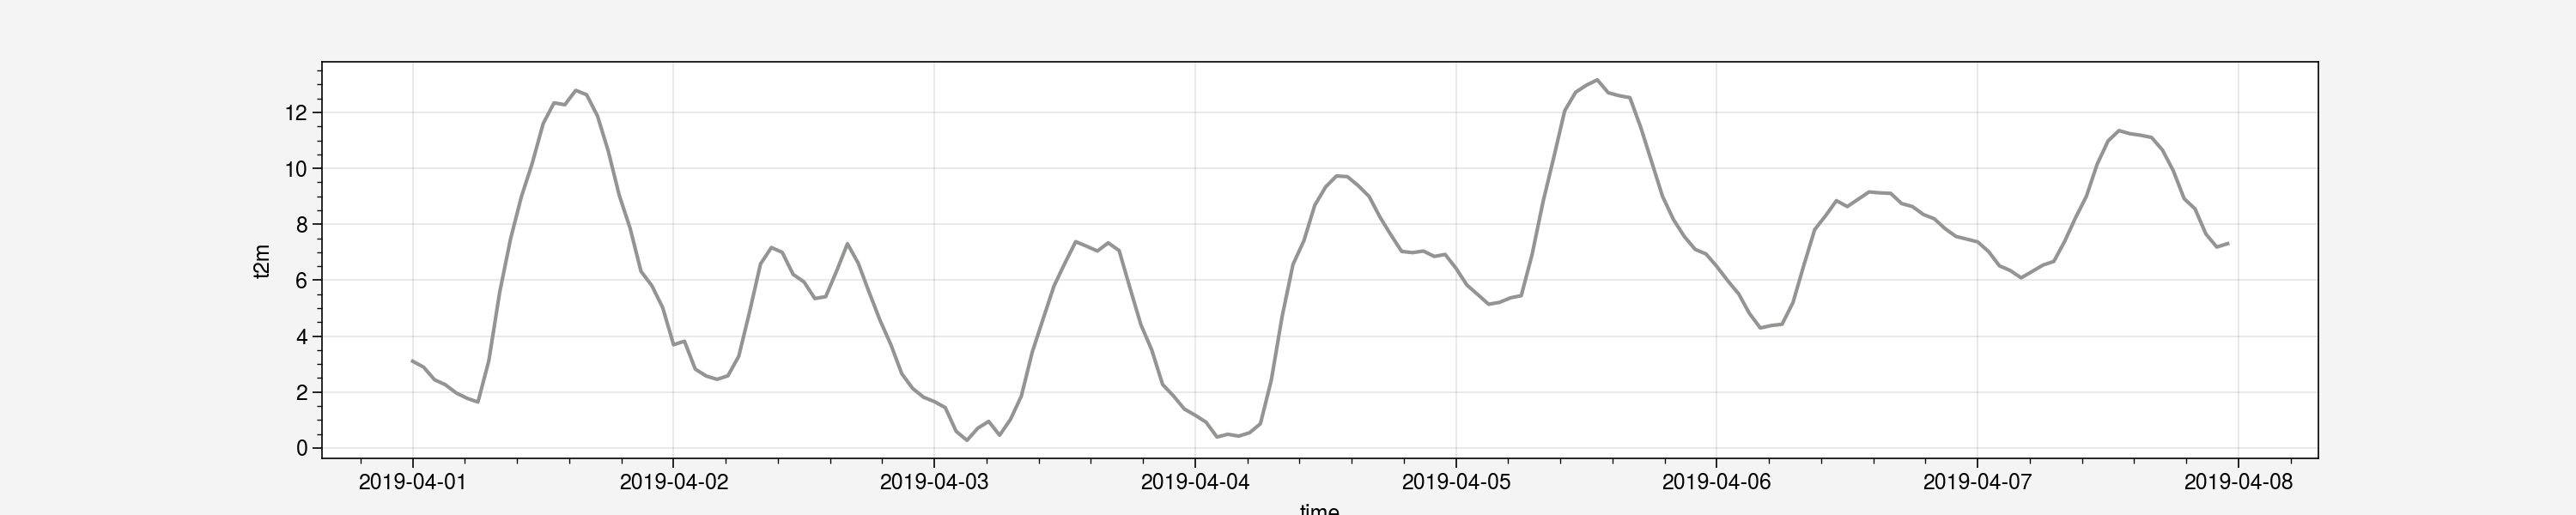

In [23]:
plt.figure(figsize=(15,3))
sns.lineplot(data = weather_data, x= 'time', y='t2m',
             color='grey')
for sun in range(sun_position.shape[0]):
    plt.axvline(x = sun_position.iloc[sun][0], color='r', linewidth = 0.5)
    plt.axvline(x = sun_position.iloc[sun][1], color='b', linewidth = 0.5)
    plt.axvline(x = sun_position.iloc[sun][2], color='y', ls="-.")

In [24]:
dates = []
for date in weather_data.time:
    dates.append("{}-{}-{}".format(date.year, date.month, date.day))
dates = np.unique(dates)
dates
# array(['2019-4-1', '2019-4-2', '2019-4-3', '2019-4-4', '2019-4-5',
#       '2019-4-6', '2019-4-7'], dtype='<U8')

array(['2019-4-1', '2019-4-2', '2019-4-3', '2019-4-4', '2019-4-5',
       '2019-4-6', '2019-4-7'], dtype='<U8')

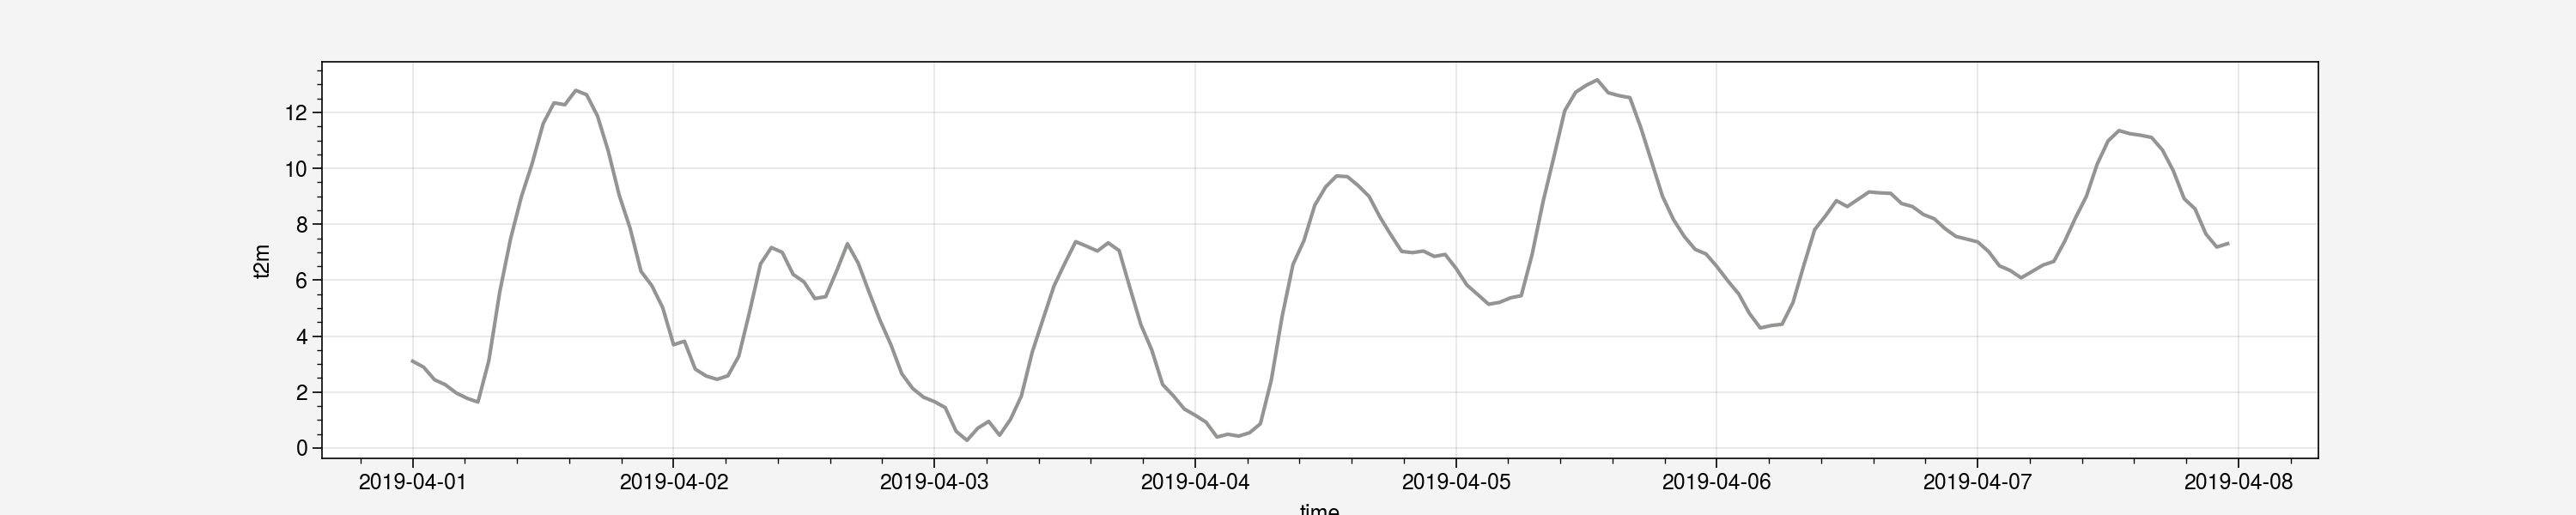

In [25]:
plt.figure(figsize=(15,3))
sns.lineplot(data = weather_data, x= 'time', y='t2m',
             color='grey')
for sun in range(sun_position.shape[0]):
    plt.axvline(x = sun_position.iloc[sun][0], color='r', linewidth = 0.5)
    plt.axvline(x = sun_position.iloc[sun][1], color='b', linewidth = 0.5)
    plt.axvline(x = sun_position.iloc[sun][2], color='y', ls="-.")

Temperature for 2019
A week was fun, but can we repeat the experiment for a one year period?

In [26]:
latitude  = "52.205337"
longitude = "0.121817"

file_location = get_weather_data(
    year  = "2019",
    day   = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
             '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
             '25', '26', '27', '28', '29', '30', '31'],
    month = ['01', '02', '03','04', '05', '06', '07', '08', '09','10', '11', '12'],
    area  = latitude +'/'+ longitude +'/'+ latitude +'/'+ longitude,
    time  = ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00',
             '06:00', '07:00', '08:00', '09:00', '10:00', '11:00',
             '12:00', '13:00', '14:00', '15:00', '16:00', '17:00',
             '18:00', '19:00', '20:00', '21:00', '22:00', '23:00'],
    file_location = 'weather_for_2019.nc'
)

2023-07-23 02:28:14,550 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-07-23 02:28:14,555 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-07-23 02:28:14,627 INFO Request is queued
INFO:cdsapi:Request is queued
2023-07-23 02:28:15,664 INFO Request is running
INFO:cdsapi:Request is running
2023-07-23 02:32:32,826 INFO Request is completed
INFO:cdsapi:Request is completed
2023-07-23 02:32:32,830 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data6/adaptor.mars.internal-1690079494.0427632-31469-6-7446303a-cfdd-47eb-b37e-7f50f6dd941e.nc to weather_for_2019.nc (52.4K)
INFO:cdsapi:Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data6/adaptor.mars.internal-1690079494.0427632-31469-6-7446303a-cfdd-47eb-b37e-7f50f6dd941e.nc to we

<AxesSubplot:xlabel='time', ylabel='t2m'>

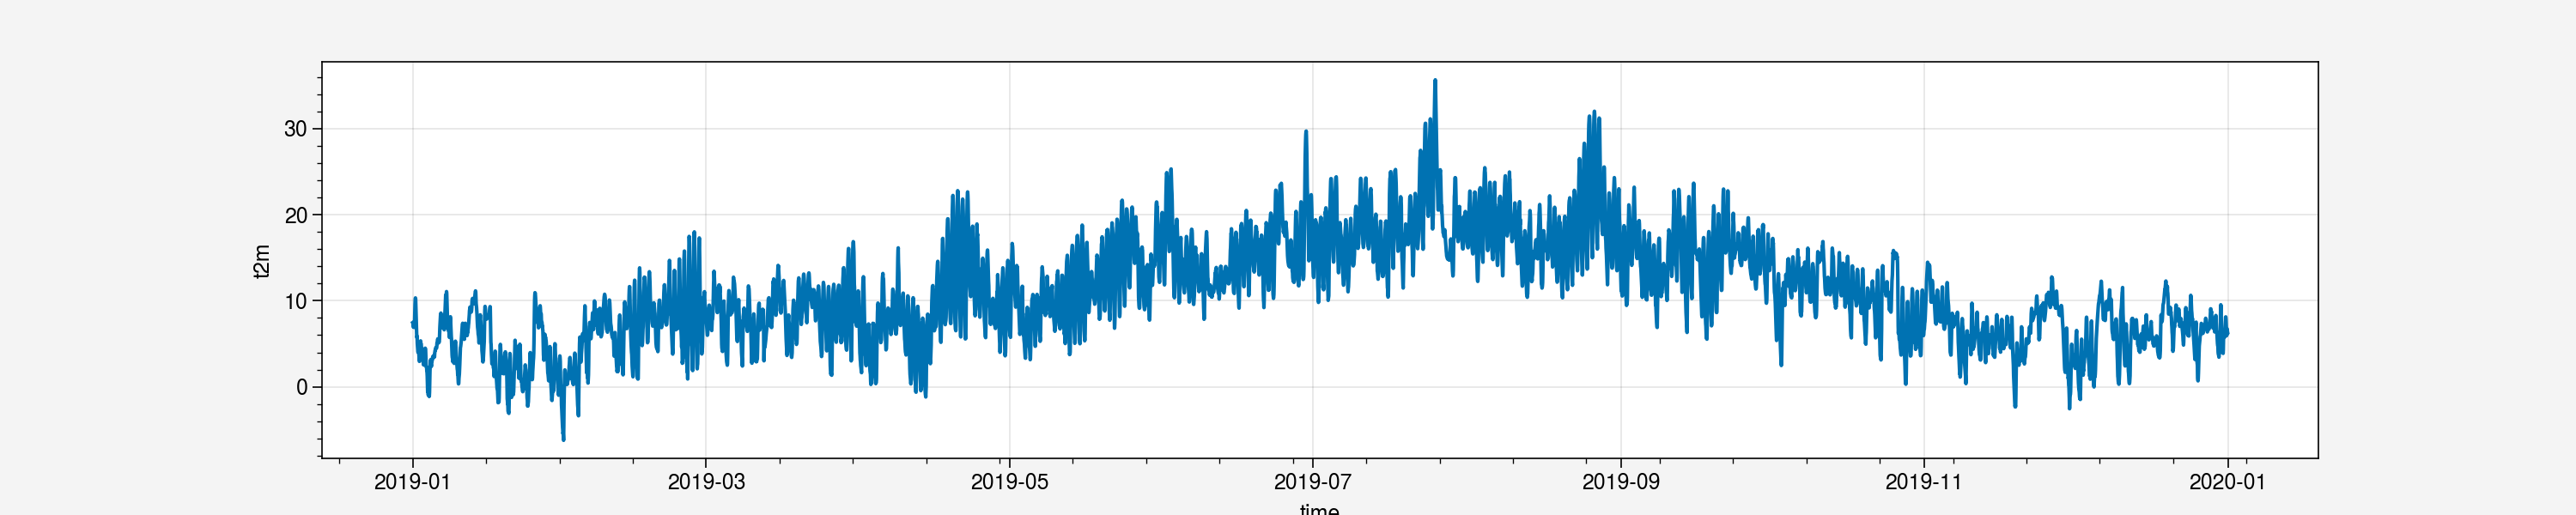

In [27]:

values_for_2019 = read_netcdf_file('weather_for_2019.nc')

plt.figure(figsize=(15,3))
sns.lineplot(data = values_for_2019, x= 'time', y='t2m')

2023-07-23 02:34:28,755 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-07-23 02:34:28,760 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-07-23 02:34:28,836 INFO Request is queued
INFO:cdsapi:Request is queued
2023-07-23 02:34:29,872 INFO Request is running
INFO:cdsapi:Request is running
2023-07-23 02:40:47,282 INFO Request is completed
INFO:cdsapi:Request is completed
2023-07-23 02:40:47,289 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data1/adaptor.mars.internal-1690079949.6576052-4783-12-4ddbb857-a932-44b5-a730-05c9d830e447.nc to weather_from_1979.nc (24.1K)
INFO:cdsapi:Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data1/adaptor.mars.internal-1690079949.6576052-4783-12-4ddbb857-a932-44b5-a730-05c9d830e447.nc to w

<AxesSubplot:xlabel='time', ylabel='t2m'>

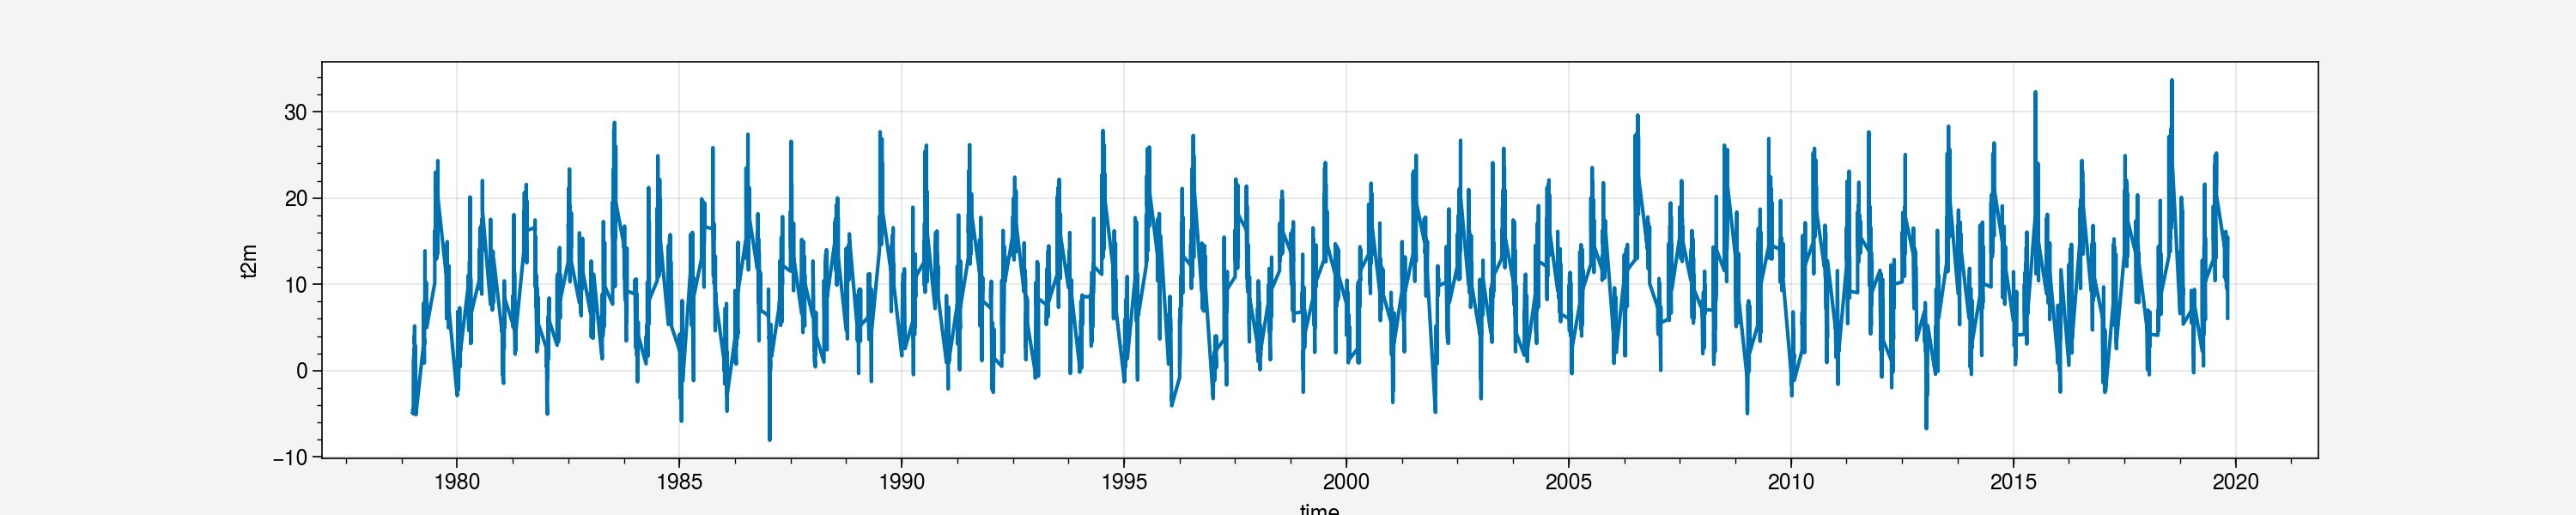

In [29]:
latitude  = "52.205337"
longitude = "0.121817"

file_location = get_weather_data(
    year  = ['1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
             '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
             '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
             '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
             '2019'],
    day   = ['01', '06', '11', '16', '21', '26'],
    month = ['01', '04', '07', '10'],
    time  = ['03:00', '09:00', '15:00', '21:00'],

    area  = latitude +'/'+ longitude +'/'+ latitude +'/'+ longitude,

    file_location = 'weather_from_1979.nc')

# And the result is:

weather_from_1979 = read_netcdf_file('weather_from_1979.nc')
plt.figure(figsize=(15,3))
sns.lineplot(data = weather_from_1979, x = 'time', y = 't2m')

Let’s do some simple prediction

Because datatimes don’t work well with linear regression, we convert all the dates back into days and hours.

In [30]:
points = []
for x in range(len(weather_from_1979.time)):
    b = datetime.strptime(str(weather_from_1979.time[x]), "%Y-%m-%d %H:%M:%S")
    a = datetime.strptime(str(weather_from_1979.time[0]), "%Y-%m-%d %H:%M:%S")
    c = b-a
    points.append(c.days +c.seconds/3600/24)

In [31]:
from sklearn.linear_model import LinearRegression
X = np.array(points).reshape(-1, 1)
Y = np.array(weather_from_1979.t2m).reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

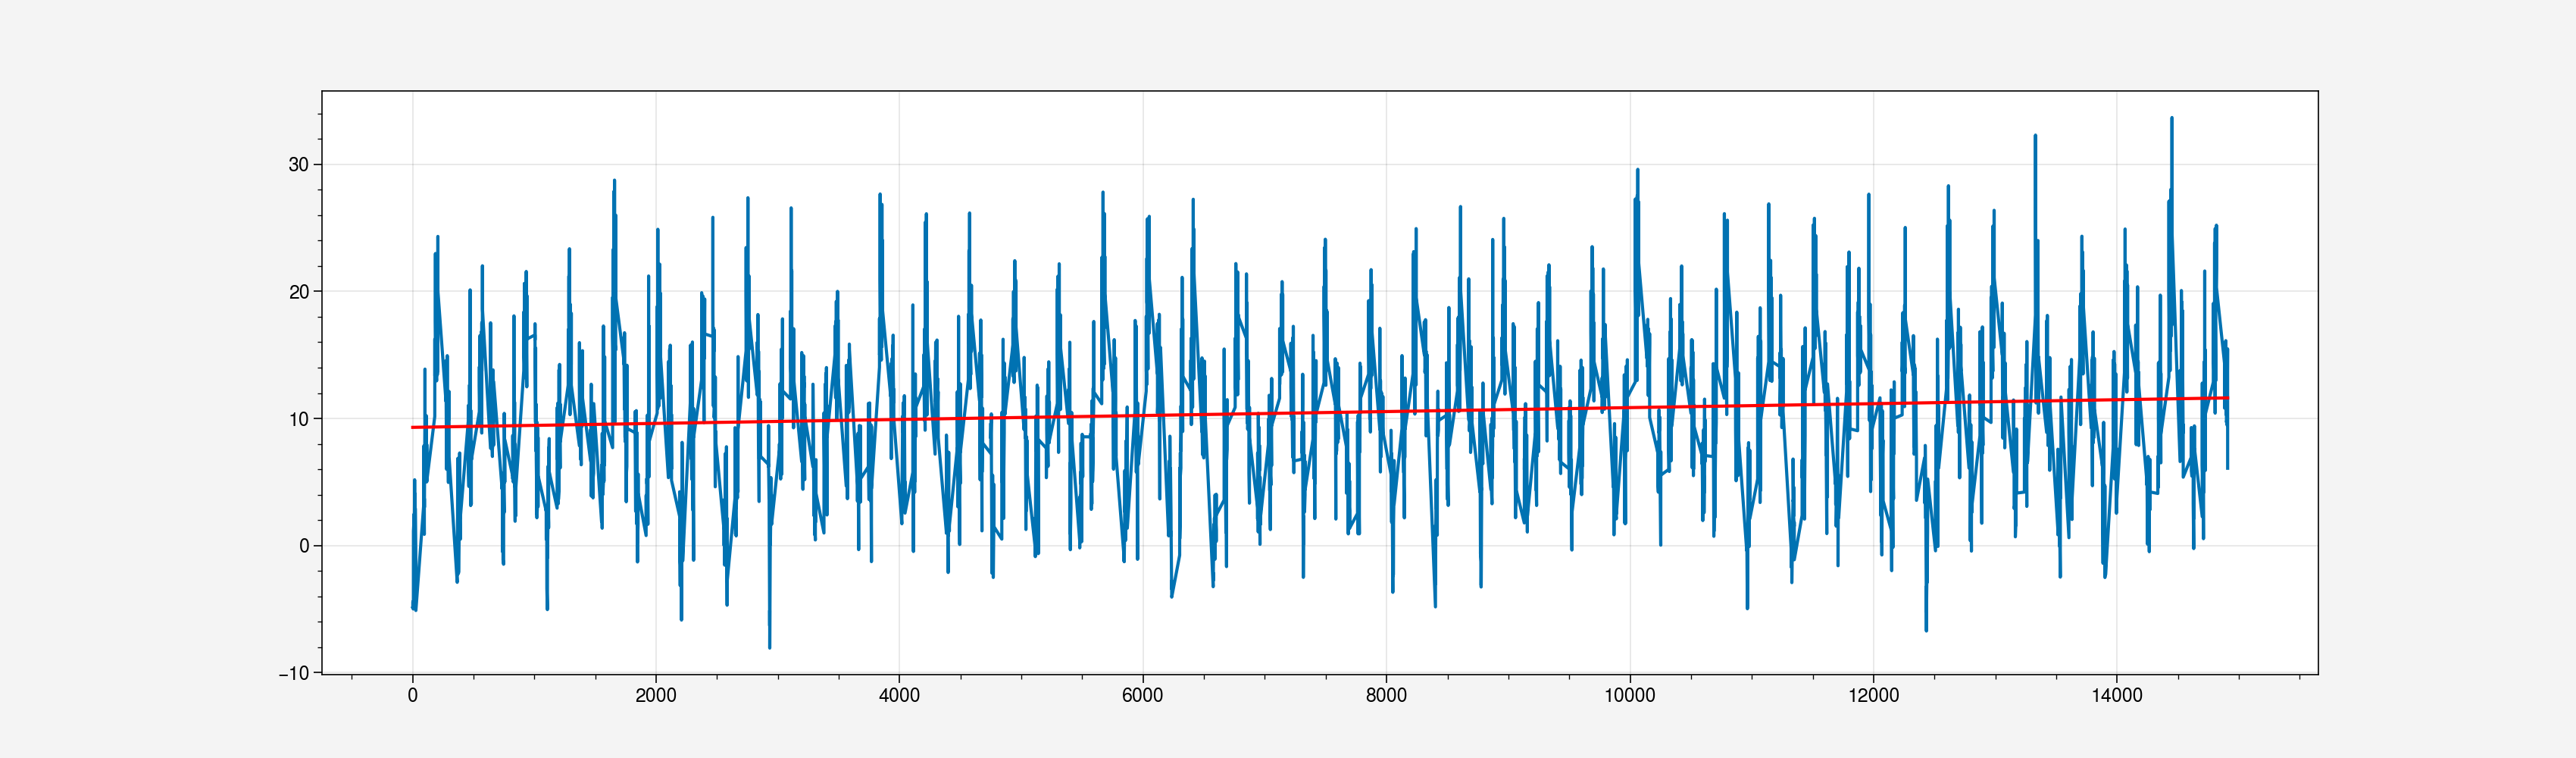

In [32]:
plt.figure(figsize=(17,5))
plt.plot(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [33]:
print(weather_from_1979["t2m"][weather_from_1979.time=="1980-01-01"].mean())
print(weather_from_1979["t2m"][weather_from_1979.time=="2018-12-31"].mean())
# 8.441398057975517
# 10.423848775338085

nan
nan


In [34]:
weather_from_1979

,t2m,time
0,-4.922276,1979-01-01 03:00:00
1,-4.929926,1979-01-01 09:00:00
2,-4.833031,1979-01-01 15:00:00
3,-4.449278,1979-01-01 21:00:00
4,-4.377245,1979-01-06 03:00:00
...,...,...
3931,9.470377,2019-10-21 21:00:00
3932,15.482934,2019-10-26 03:00:00
3933,15.456160,2019-10-26 09:00:00
3934,12.653870,2019-10-26 15:00:00


# 气象数据其他数据源

https://github.com/planet-os/notebooks/tree/master/api-examples

# aws/era5-s3-via-boto


https://github.com/planet-os/notebooks/blob/master/aws/era5-s3-via-boto.ipynb

In [37]:
!python -m pip install boto3 xarray netcdf4 -i https://pypi.org/simple/

Looking in indexes: https://pypi.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.4 MB/s eta 0:00:00


In [38]:
# Initialize notebook environment.
%matplotlib inline
import boto3
import botocore
import datetime
import matplotlib.pyplot as plt
import os.path
import xarray as xr

In [39]:
era5_bucket = 'era5-pds'

# AWS access / secret keys required
# s3 = boto3.resource('s3')
# bucket = s3.Bucket(era5_bucket)

# No AWS keys required
client = boto3.client('s3', config=botocore.client.Config(signature_version=botocore.UNSIGNED))

## ERA5 Data Structure on S3
The ERA5 data is chunked into distinct NetCDF files per variable, each containing a month of hourly data. These files are organized in the S3 bucket by year, month, and variable name.

The data is structured as follows:

/{year}/{month}/main.nc
               /data/{var1}.nc
                    /{var2}.nc
                    /{....}.nc
                    /{varN}.nc

where year is expressed as four digits (e.g. YYYY) and month as two digits (e.g. MM). Individual data variables (var1 through varN) use names corresponding to CF standard names convention plus any applicable additional info, such as vertical coordinate.

For example, the full file path for air temperature for January 2008 is:

/2008/01/data/air_temperature_at_2_metres.nc

Note that due to the nature of the ERA5 forecast timing, which is run twice daily at 06:00 and 18:00 UTC, the monthly data file begins with data from 07:00 on the first of the month and continues through 06:00 of the following month.<br> We'll see this in the coordinate values of a data file we download later in the notebook.

Granule variable structure and metadata attributes are stored in main.nc. This file contains coordinate and auxiliary variable data. This file is also annotated using NetCDF CF metadata conventions.

We can use the paginate method to list the top level key prefixes in the bucket, which corresponds to the available years of ERA5 data.

In [40]:
paginator = client.get_paginator('list_objects')
result = paginator.paginate(Bucket=era5_bucket, Delimiter='/')
for prefix in result.search('CommonPrefixes'):
    print(prefix.get('Prefix'))

1979/
1980/
1981/
1982/
1983/
1984/
1985/
1986/
1987/
1988/
1989/
1990/
1991/
1992/
1993/
1994/
1995/
1996/
1997/
1998/
1999/
2000/
2001/
2002/
2003/
2004/
2005/
2006/
2007/
2008/
2009/
2010/
2011/
2012/
2013/
2014/
2015/
2016/
2017/
2018/
2019/
2020/
2021/
2022/
2023/
QA/
zarr/


## Downloading Files


Let's download main.nc file for that month and use xarray to inspect the metadata relating to the data files.

In [44]:
keys = []
date = datetime.date(2023,6,1) # update to desired date
prefix = date.strftime('%Y/%m/')

response = client.list_objects_v2(Bucket=era5_bucket, Prefix=prefix)
response_meta = response.get('ResponseMetadata')

if response_meta.get('HTTPStatusCode') == 200:
    contents = response.get('Contents')
    if contents == None:
        print("No objects are available for %s" % date.strftime('%B, %Y'))
    else:
        for obj in contents:
            keys.append(obj.get('Key'))
        print("There are %s objects available for %s\n--" % (len(keys), date.strftime('%B, %Y')))
        for k in keys:
            print(k)
else:
    print("There was an error with your request.")

There are 19 objects available for June, 2023
--
2023/06/data/air_pressure_at_mean_sea_level.nc
2023/06/data/air_temperature_at_2_metres.nc
2023/06/data/air_temperature_at_2_metres_1hour_Maximum.nc
2023/06/data/air_temperature_at_2_metres_1hour_Minimum.nc
2023/06/data/dew_point_temperature_at_2_metres.nc
2023/06/data/eastward_wind_at_100_metres.nc
2023/06/data/eastward_wind_at_10_metres.nc
2023/06/data/integral_wrt_time_of_surface_direct_downwelling_shortwave_flux_in_air_1hour_Accumulation.nc
2023/06/data/lwe_thickness_of_surface_snow_amount.nc
2023/06/data/northward_wind_at_100_metres.nc
2023/06/data/northward_wind_at_10_metres.nc
2023/06/data/precipitation_amount_1hour_Accumulation.nc
2023/06/data/sea_surface_temperature.nc
2023/06/data/sea_surface_wave_from_direction.nc
2023/06/data/sea_surface_wave_mean_period.nc
2023/06/data/significant_height_of_wind_and_swell_waves.nc
2023/06/data/snow_density.nc
2023/06/data/surface_air_pressure.nc
2023/06/main.nc


In [45]:
metadata_file = 'main.nc'
metadata_key = prefix + metadata_file
client.download_file(era5_bucket, metadata_key, metadata_file)
ds_meta = xr.open_dataset('main.nc', decode_times=False)
ds_meta.info()

xarray.Dataset {
dimensions:
	lon = 1440 ;
	lat = 721 ;
	time0 = 720 ;
	time1 = 720 ;
	lon_ocean = 720 ;
	lat_ocean = 361 ;
	nv = 2 ;

variables:
	float32 lon(lon) ;
		lon:standard_name = longitude ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;
	float32 lat(lat) ;
		lat:standard_name = latitude ;
		lat:long_name = latitude ;
		lat:units = degrees_north ;
	float64 time0(time0) ;
		time0:units = seconds since 1970-01-01 ;
		time0:standard_name = time ;
	float64 time1(time1) ;
		time1:units = seconds since 1970-01-01 ;
		time1:standard_name = time ;
		time1:bounds = time1_bounds ;
	float32 lon_ocean(lon_ocean) ;
		lon_ocean:standard_name = longitude ;
		lon_ocean:long_name = longitude ;
		lon_ocean:units = degrees_east ;
	float32 lat_ocean(lat_ocean) ;
		lat_ocean:standard_name = latitude ;
		lat_ocean:long_name = latitude ;
		lat_ocean:units = degrees_north ;
	float32 northward_wind_at_10_metres(time0, lat, lon) ;
		northward_wind_at_10_metres:least_significant_digit = 1 ;


Now let's acquire data for a single variable over the course of a month. Let's download air temperature for August of 2017 and open the NetCDF file using xarray.



Note that the cell below may take some time to execute, depending on your connection speed. Most of the variable files are roughly 1 GB in size.

In [46]:
# select date and variable of interest
date = datetime.date(2017,8,1)
var = 'air_temperature_at_2_metres'

# file path patterns for remote S3 objects and corresponding local file
s3_data_ptrn = '{year}/{month}/data/{var}.nc'
data_file_ptrn = '{year}{month}_{var}.nc'

year = date.strftime('%Y')
month = date.strftime('%m')
s3_data_key = s3_data_ptrn.format(year=year, month=month, var=var)
data_file = data_file_ptrn.format(year=year, month=month, var=var)

if not os.path.isfile(data_file): # check if file already exists
    print("Downloading %s from S3..." % s3_data_key)
    client.download_file(era5_bucket, s3_data_key, data_file)

ds = xr.open_dataset(data_file)
ds.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:                      (lon: 1440, lat: 721, time0: 744)
Coordinates:
  * lon                          (lon) float32 0.0 0.25 0.5 ... 359.5 359.8
  * lat                          (lat) float32 90.0 89.75 89.5 ... -89.75 -90.0
  * time0                        (time0) datetime64[ns] 2017-08-01 ... 2017-0...
Data variables:
    air_temperature_at_2_metres  (time0, lat, lon) float32 ...
Attributes:
    source:       Reanalysis
    institution:  ECMWF
    tilte:        ERA5 forecasts>

In [47]:
ds.coords.values()

ValuesView(Coordinates:
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * time0    (time0) datetime64[ns] 2017-08-01 ... 2017-08-31T23:00:00)

In the coordinate values, we can see that longitude is expressed as degrees east, ranging from 0 to 359.718 degrees. Latitude is expressed as degrees north, ranging from -89.784874 to 89.784874. And finally the time0 coordinate, ranging from 2017-08-01T07:00:00Z to 2017-09-01T06:00:00Z.


As mentioned above, due to the forecast run timing the first forecast run of the month results in data beginning at 07:00, while the last produces data through September 1 at 06:00.


## Temperature at Specific Locations
Let's create a list of various locations and plot their temperature values during the month. Note that the longitude values of the coordinates below are not given in degrees east, but rather as a mix of eastward and westward values.

The data's longitude coordinate is degrees east, so we'll convert these location coordinates accordingly to match the data.

In [48]:
# location coordinates
locs = [
    {'name': 'santa_monica', 'lon': -118.496245, 'lat': 34.010341},
    {'name': 'tallinn', 'lon': 24.753574, 'lat': 59.436962},
    {'name': 'honolulu', 'lon': -157.835938, 'lat': 21.290014},
    {'name': 'cape_town', 'lon': 18.423300, 'lat': -33.918861},
    {'name': 'dubai', 'lon': 55.316666, 'lat': 25.266666},
]

# convert westward longitudes to degrees east
for l in locs:
    if l['lon'] < 0:
        l['lon'] = 360 + l['lon']
locs

[{'name': 'santa_monica', 'lon': 241.503755, 'lat': 34.010341},
 {'name': 'tallinn', 'lon': 24.753574, 'lat': 59.436962},
 {'name': 'honolulu', 'lon': 202.164062, 'lat': 21.290014},
 {'name': 'cape_town', 'lon': 18.4233, 'lat': -33.918861},
 {'name': 'dubai', 'lon': 55.316666, 'lat': 25.266666}]

In [49]:
ds_locs = xr.Dataset()

# interate through the locations and create a dataset
# containing the temperature values for each location
for l in locs:
    name = l['name']
    lon = l['lon']
    lat = l['lat']
    var_name = name

    ds2 = ds.sel(lon=lon, lat=lat, method='nearest')

    lon_attr = '%s_lon' % name
    lat_attr = '%s_lat' % name

    ds2.attrs[lon_attr] = ds2.lon.values.tolist()
    ds2.attrs[lat_attr] = ds2.lat.values.tolist()
    ds2 = ds2.rename({var : var_name}).drop(('lat', 'lon'))

    ds_locs = xr.merge([ds_locs, ds2])

ds_locs.data_vars


Data variables:
    santa_monica  (time0) float32 ...
    tallinn       (time0) float32 ...
    honolulu      (time0) float32 ...
    cape_town     (time0) float32 ...
    dubai         (time0) float32 ...

## Convert Units and Create a Dataframe
Temperature data in the ERA5 dataset uses Kelvin. Let's convert it to something more meaningful. I've chosen to use Fahrenheit, because as a U.S. citizen (and stubborn metric holdout) Celcius still feels foreign to me ;-)

While we're at it, let's also convert the dataset to a pandas dataframe and use the describe method to display some statistics about the data.

In [50]:
def kelvin_to_celcius(t):
    return t - 273.15

def kelvin_to_fahrenheit(t):
    return t * 9/5 - 459.67

ds_locs_f = ds_locs.apply(kelvin_to_fahrenheit)

df_f = ds_locs_f.to_dataframe()
df_f.describe()

,santa_monica,tallinn,honolulu,cape_town,dubai
count,744.000000,744.000000,744.000000,744.000000,744.000000
mean,73.106552,61.415016,78.957756,56.433109,96.109467
std,6.338440,5.503950,0.793092,3.211381,5.983307
min,62.779999,46.467499,76.167511,48.492493,82.579987
25%,67.842499,57.605011,78.417511,54.230011,91.355011
50%,72.286255,61.373718,78.867462,56.142487,95.629974
75%,77.292511,65.142487,79.542511,58.279999,100.917511
max,94.392487,77.517487,80.892487,67.504974,108.904999


In [51]:
df_f

,santa_monica,tallinn,honolulu,cape_town,dubai
time0,,,,,
2017-08-01 00:00:00,79.767487,60.192474,79.654999,59.517487,90.904999
2017-08-01 01:00:00,78.079987,60.192474,79.542511,59.517487,90.567474
2017-08-01 02:00:00,76.504974,60.079987,79.317474,59.067474,90.117462
2017-08-01 03:00:00,73.355011,60.304962,78.754974,58.730011,90.679962
2017-08-01 04:00:00,72.230011,61.204987,78.417511,58.730011,92.254974
...,...,...,...,...,...
2017-08-31 19:00:00,90.792511,64.242462,79.204987,56.142487,89.554962
2017-08-31 20:00:00,90.904999,64.355011,79.317474,55.355011,88.317474
2017-08-31 21:00:00,90.792511,64.467499,79.654999,55.467499,87.642487


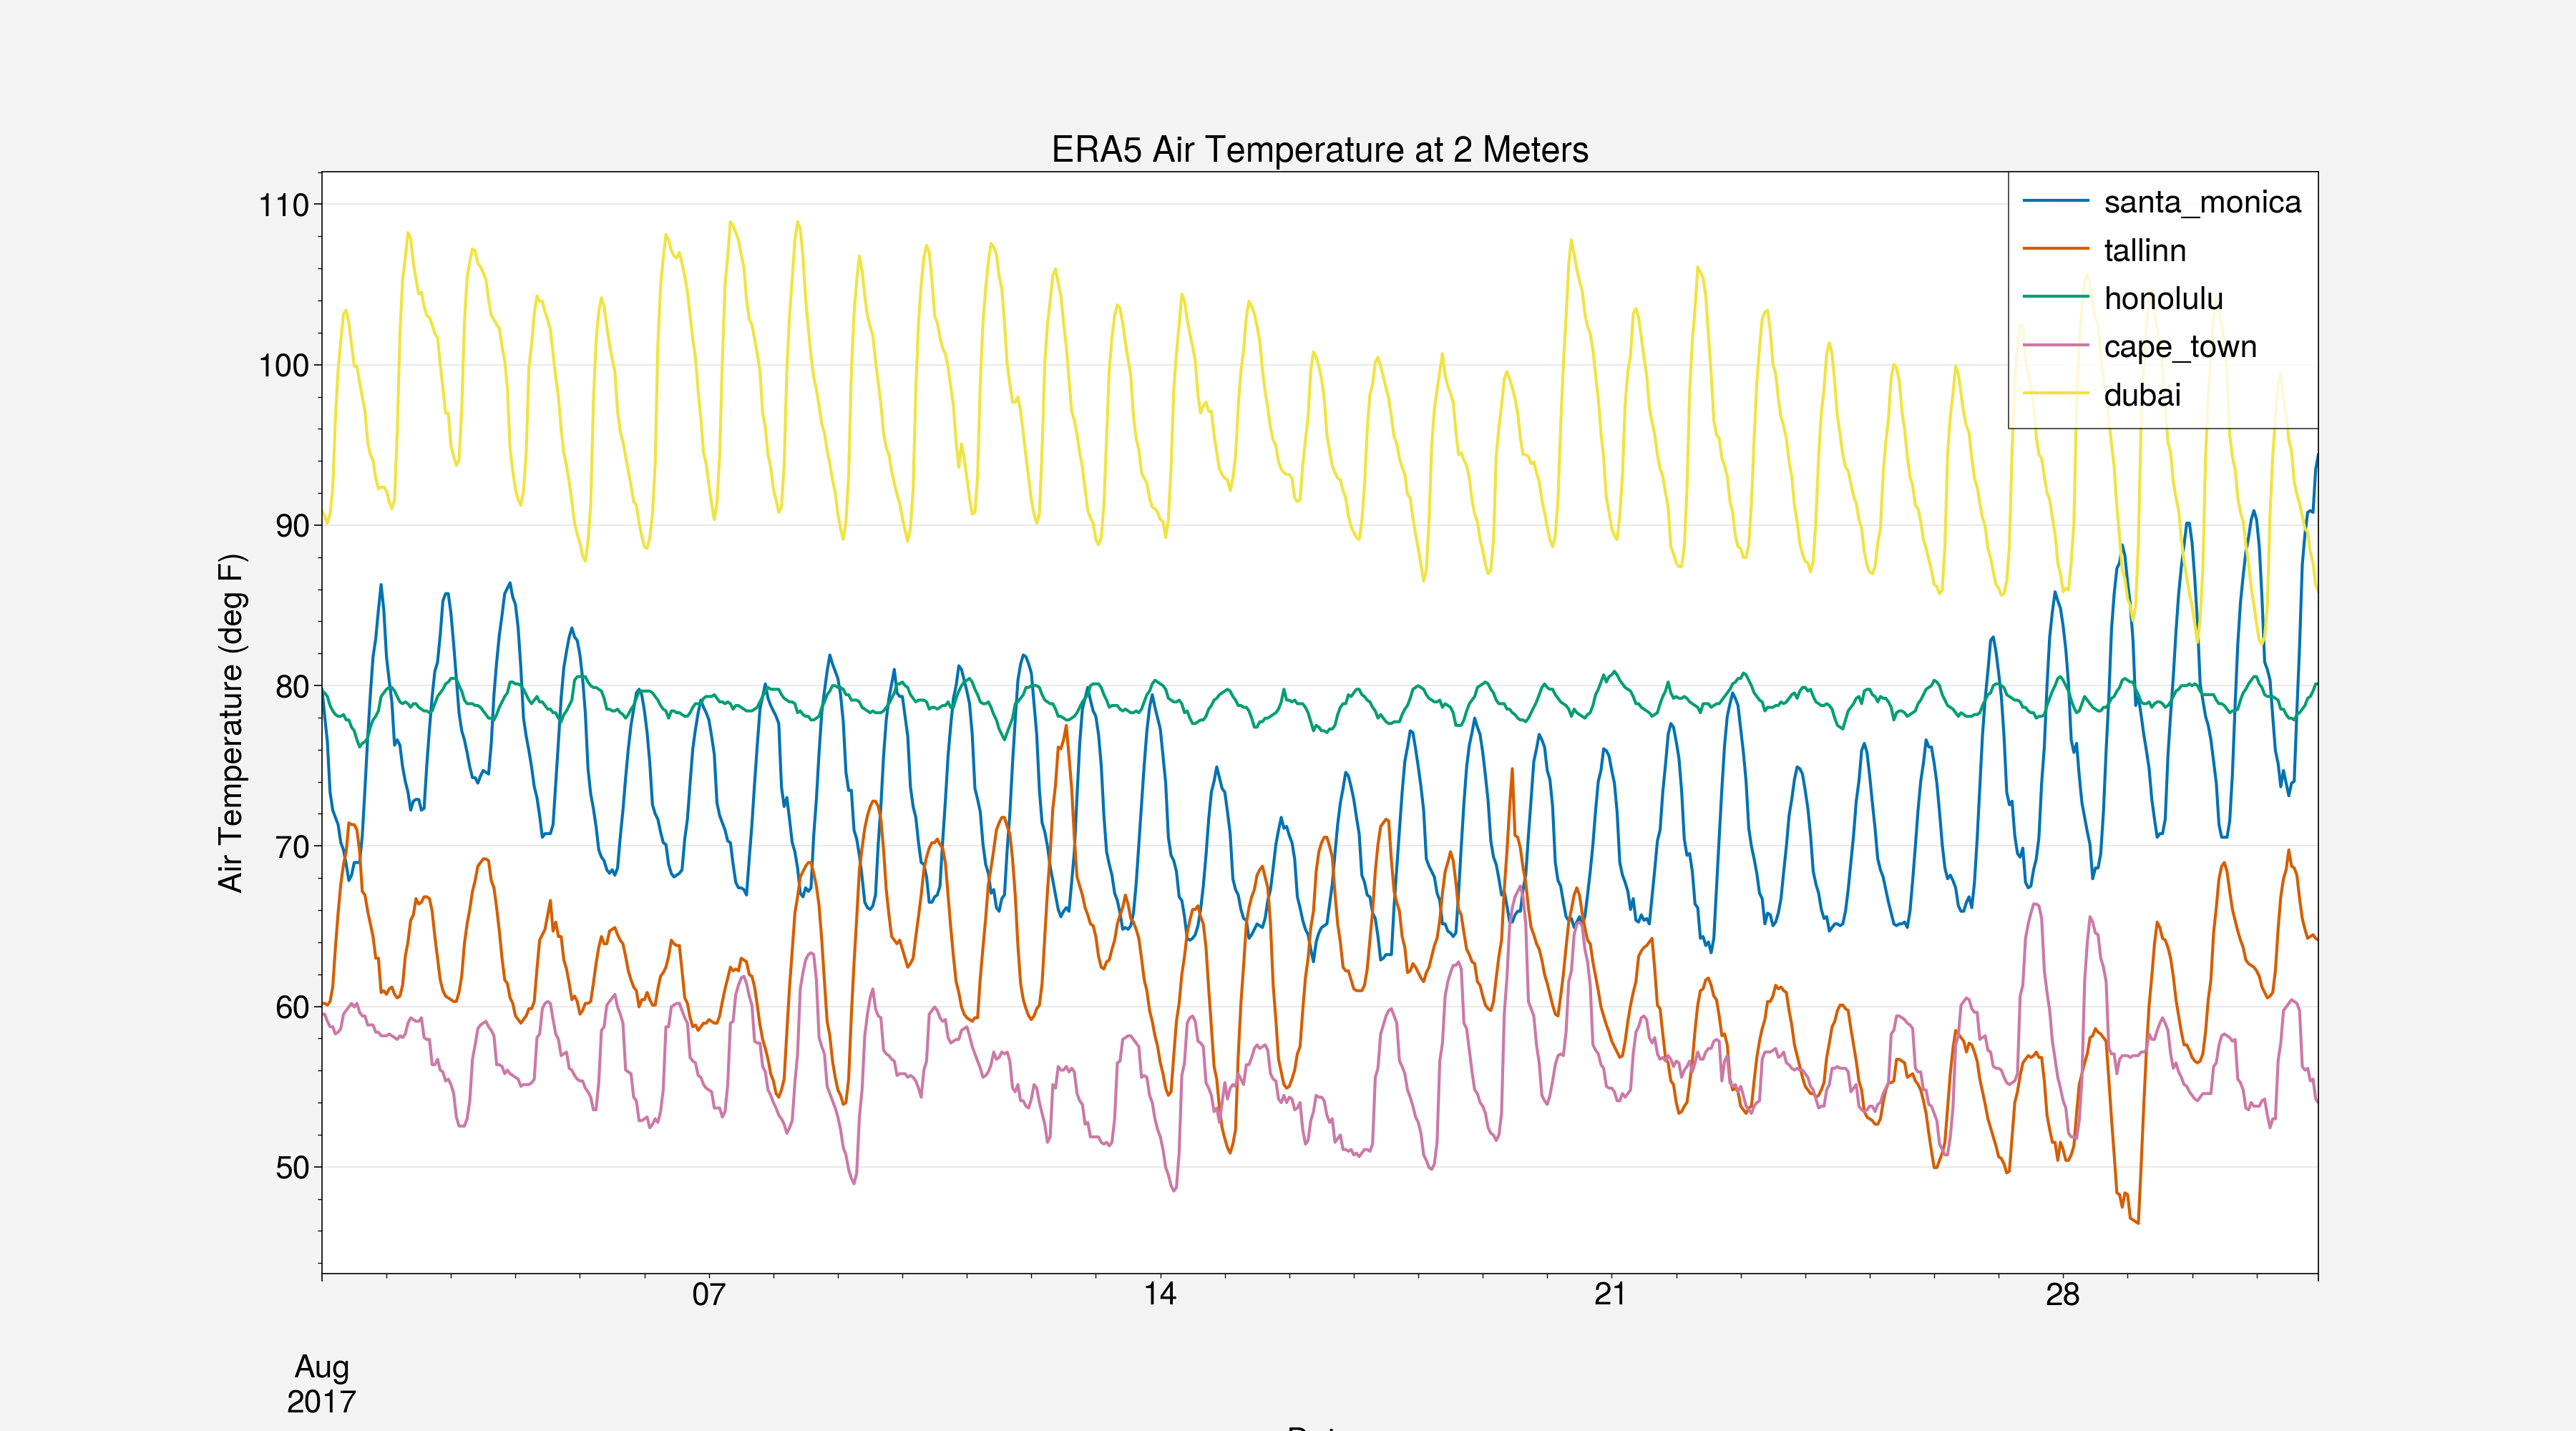

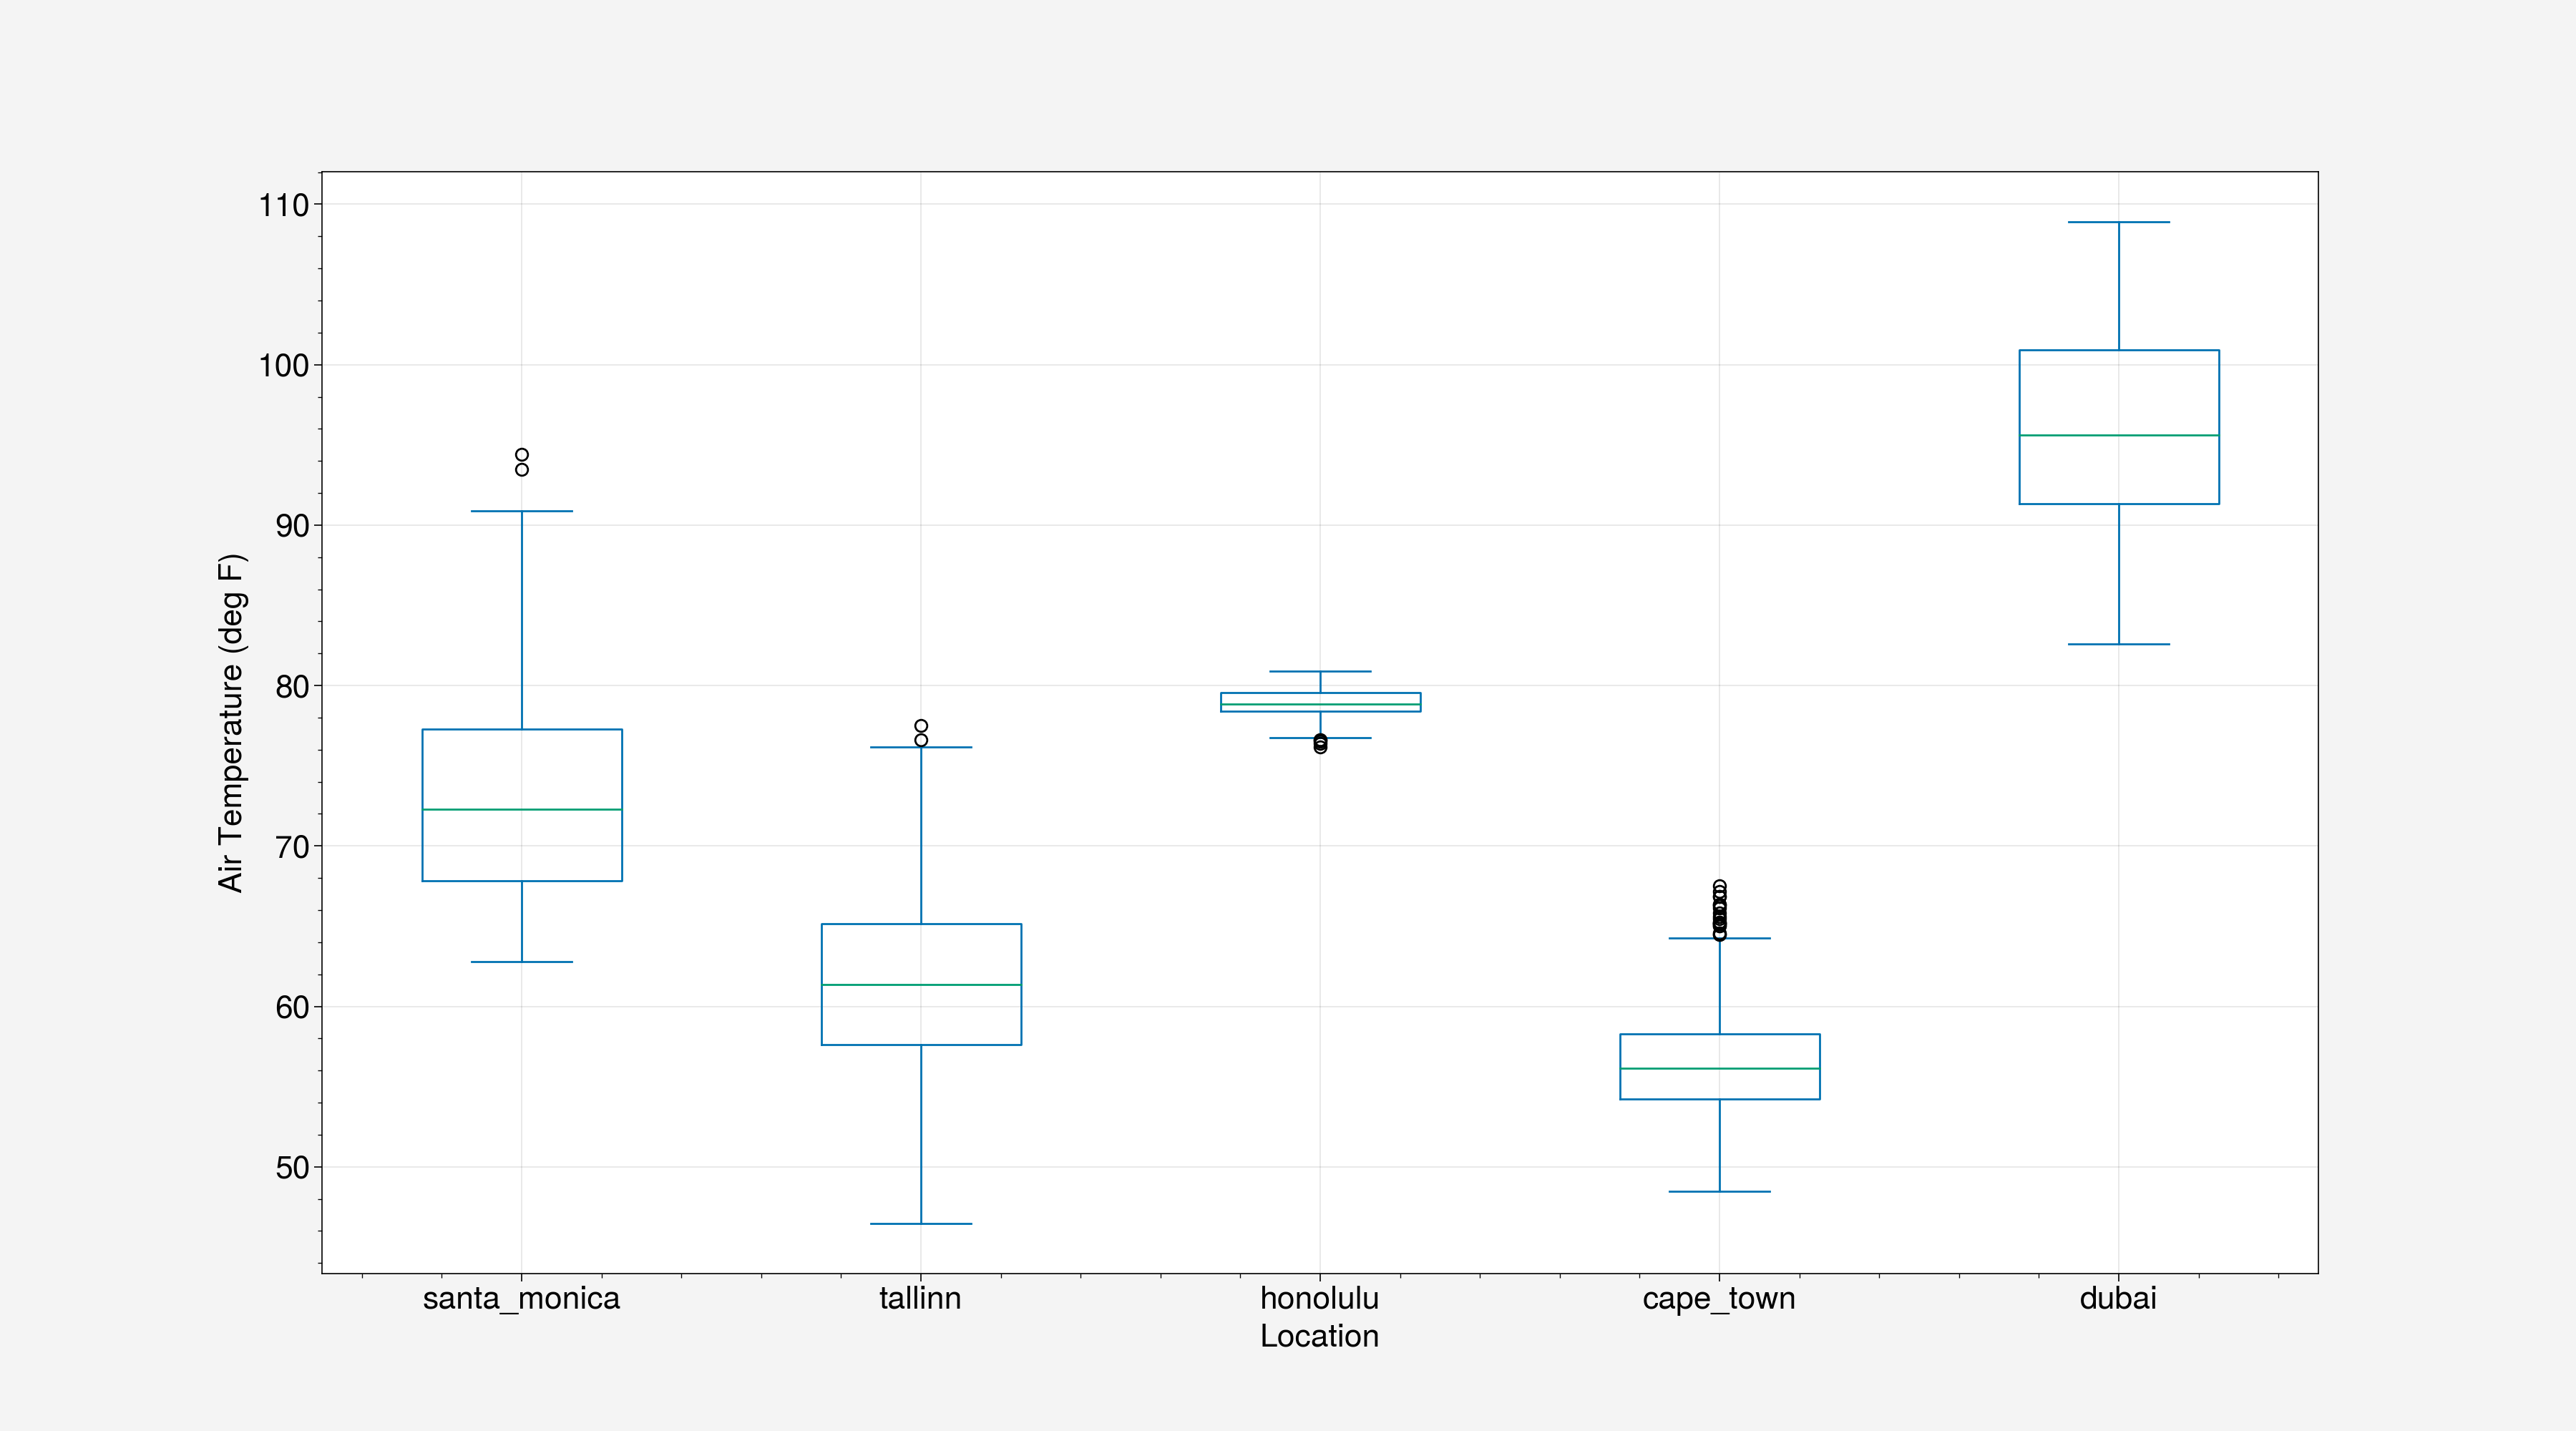

In [52]:
# readability please
plt.rcParams.update({'font.size': 16})

ax = df_f.plot(figsize=(18, 10), title="ERA5 Air Temperature at 2 Meters", grid=1)
ax.set(xlabel='Date', ylabel='Air Temperature (deg F)')
plt.show()

ax = df_f.plot.box(figsize=(18, 10))
ax.set(xlabel='Location', ylabel='Air Temperature (deg F)')
plt.show()


# 坐标度分秒转换为十进制

In [1]:
import pandas as pd

In [2]:
#[十进制] 转换为 [度分秒]

def dec2rad(dec):
    NumIntegral = int(dec)  # 整数部分
    NumDecimal = dec- NumIntegral  # 小数部分

    tmp = NumDecimal * 3600
    degree = NumIntegral  # 度
    minute = int(tmp//60) # 分
    second = tmp - minute*60  # 秒 tmp%3600

    return degree, minute, second

In [54]:
dec2rad(34.45)

(34, 27, 1.0231815394945443e-11)

In [3]:
#[度分秒] 转换为 [十进制]

def rad2dec(d,m,s):
    decNum = d + m/60.0 + s/3600.0
    return decNum

In [57]:
! wget http://data.cma.cn/article/showPDFFile.html?file=/pic/static/doc/A/A.0012.0001/SURF_CHN_MUL_HOR_STATION.pdf

--2023-07-23 03:20:30--  http://data.cma.cn/article/showPDFFile.html?file=/pic/static/doc/A/A.0012.0001/SURF_CHN_MUL_HOR_STATION.pdf
Resolving data.cma.cn (data.cma.cn)... 101.201.172.75
Connecting to data.cma.cn (data.cma.cn)|101.201.172.75|:80... connected.
HTTP request sent, awaiting response... 403 Forbidden
2023-07-23 03:20:31 ERROR 403: Forbidden.



In [59]:
! pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 41.6 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
  Attempting uninstall: cryptography
    Found existing installation: cryptography 3.4.8
    Uninstalling cryptography-3.4.8:
      Successfully uninstalled cryptography-3.4.8


In [4]:
import pdfplumber
import pandas as pd

In [ ]:
from pdfplumber import

In [5]:
with pdfplumber.open('/content/SURF_CHN_MUL_HOR_STATION.pdf') as pdf:
    page = pdf.pages[0]
    for row in page.extract_table():
        print(row)

['省份', '区站号', '站名', '纬度(度分)', '经度(度分)', '气压传感器拔海高度(米)', '观测场拔海高度(米)']
['北京', '54398', '顺义', '4013', '11662', '29.1', '27.9']
['北京', '54399', '海淀', '3999', '11629', '47.5', '46.3']
['北京', '54406', '延庆', '4045', '11597', '488.7', '487.5']
['北京', '54416', '密云', '4038', '11686', '72.6', '71.4']
['北京', '54419', '怀柔', '4036', '11663', '76.4', '75.2']
['北京', '54421', '密云上甸子', '4066', '11711', '293.6', '292.4']
['北京', '54424', '平谷', '4017', '11712', '32.3', '31.1']
['北京', '54431', '通州', '3985', '11676', '21.0', '19.8']
['北京', '54433', '朝阳', '3995', '11650', '35.6', '34.4']
['北京', '54499', '昌平', '4022', '11621', '76.9', '75.7']
['北京', '54501', '斋堂', '3997', '11569', '441.3', '440.1']
['北京', '54505', '门头沟', '3989', '11616', '86.7', '85.5']
['北京', '54511', '北京', '3981', '11647', '34.0', '32.8']
['北京', '54513', '石景山', '3994', '11621', '64.2', '63.0']
['北京', '54514', '丰台', '3987', '11625', '56.2', '55.0']
['北京', '54594', '大兴', '3972', '11635', '38.7', '37.5']
['北京', '54596', '房山', '3977', '11619', 

In [6]:
# 通过.pages属性获取pdf页数
print(len(pdf.pages))

41


In [7]:
# 第一页pdfplumber.Page实例
first_page = pdf.pages[0]
# 查看页码
print('页码：',first_page.page_number)
# 查看页宽
print('页宽：',first_page.width)
# 查看页高
print('页高：',first_page.height)

页码： 1
页宽： 595.25
页高： 841.85


In [9]:
def pdf2excel(path):
    table_list = []
    with pdfplumber.open(path) as pdf:
        for num in range(len(pdf.pages)):
            page = pdf.pages[num]
            for row in page.extract_table():
                table_list.append(row)
    table_df = pd.DataFrame(table_list[1:], columns=table_list[0])
    return table_df

In [10]:
# 将探空站点信息转换为Excel
# 共有89个探空站点
table_df = pdf2excel('/content/SURF_CHN_MUL_HOR_STATION.pdf')
table_df

,省份,区站号,站名,纬度(度分),经度(度分),气压传感器拔海高度(米),观测场拔海高度(米)
0,北京,54398,顺义,4013,11662,29.1,27.9
1,北京,54399,海淀,3999,11629,47.5,46.3
2,北京,54406,延庆,4045,11597,488.7,487.5
3,北京,54416,密云,4038,11686,72.6,71.4
4,北京,54419,怀柔,4036,11663,76.4,75.2
...,...,...,...,...,...,...,...
2164,新疆,52118,伊吾,-4324,-9467,1731.2,1730.0
2165,新疆,52203,哈密,4281,9352,数\n746,745
2166,新疆,52313,红柳河,4153,9472,1575,1574
2167,极地,89058,南极长城,-5703,-6178,12,10


In [11]:
df = table_df

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169 entries, 0 to 2168
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   省份            2169 non-null   object
 1   区站号           2169 non-null   object
 2   站名            2169 non-null   object
 3   纬度(度分)        2169 non-null   object
 4   经度(度分)        2169 non-null   object
 5   气压传感器拔海高度(米)  2169 non-null   object
 6   观测场拔海高度(米)    2169 non-null   object
dtypes: object(7)
memory usage: 118.7+ KB
